# Clustering Test

### Import Dependencies

In [1]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

import csv
%run 'preprocessor.ipynb' #our own preprocessor functions

### Prepare Dataset

In [2]:
with open('data_w1w4.csv', 'r') as f:
      reader = csv.reader(f)
      data = list(reader)
    
matrix = obtain_data_matrix(data)
samples = len(matrix)

print("Number of samples: " + str(samples))
print("First entry: " + str(matrix[0]))

Number of samples: 176
First entry: [[2680 1 0 0 0 0 0 0 4.9481 72 5 0]]


### Do PCA

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


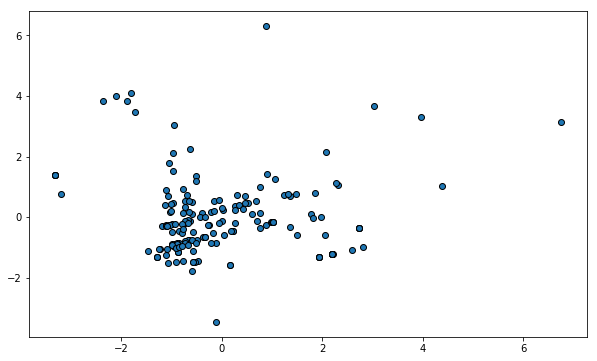

In [3]:
matrix = scale(matrix)

fig = plt.figure(1, figsize=(10, 6))
plt.clf()

plt.cla()
pca = PCA(n_components=2)
pca.fit(matrix)
X = pca.transform(matrix)

plt.scatter(X[:, 0], X[:, 1], edgecolor='k')
plt.show()

### Benchmarking Clustering

#### Function to benchmark k_means

In [4]:
def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=samples)))

#### Benchmarks without PCA

In [5]:
labels = (np.array(matrix[:,[0]])).flatten()

bench_k_means(KMeans(init='k-means++', n_clusters=5, n_init=10), name="k-means++", data=matrix)
bench_k_means(KMeans(init='random', n_clusters=5, n_init=10), name="random", data=matrix)

k-means++	0.10s	1089	0.266	0.666	0.380	0.086	0.157	0.306
random   	0.04s	1104	0.261	0.707	0.382	0.080	0.162	0.290


#### Benchmark with PCA

In [6]:
pca = PCA(n_components=5).fit(matrix)

bench_k_means(KMeans(init=pca.components_, n_clusters=5, n_init=1), name="PCA-based", data=matrix)

PCA-based	0.01s	1169	0.334	0.704	0.453	0.143	0.217	0.304


### Visualise PCA-reduced data

K-means clustering (3 clusters) on PCA-reduced data


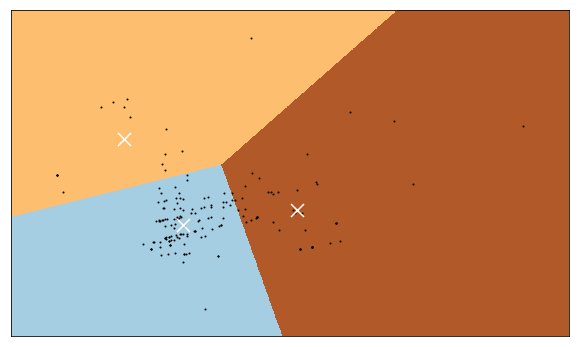

 
K-means clustering (4 clusters) on PCA-reduced data


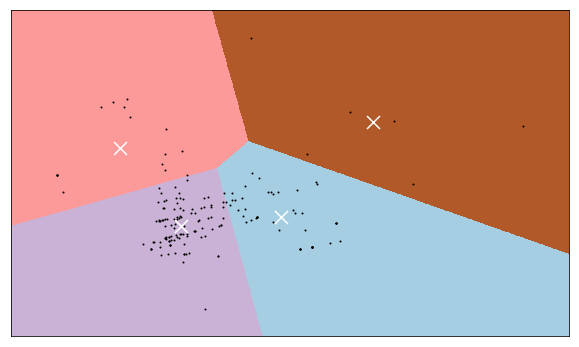

In [7]:
for i in range(3,5):
    target_clusters = i

    reduced_data = PCA(n_components=2).fit_transform(matrix)
    kmeans = KMeans(init='k-means++', n_clusters=target_clusters, n_init=10)
    kmeans.fit(reduced_data)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .01     # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(i, figsize=(10, 6))
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
    # Plot the centroids as a white X
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())

    print("K-means clustering (" + str(target_clusters) + " clusters) on PCA-reduced data")
    plt.show()
    print(" ")